# External Influences on California High School Performance
ECE 143 Spring 2018 Group Project  
Group 5: Kenny Chen, Kevin Lai, Yan Sun  
[Project Proposal](https://docs.google.com/document/d/1NXY5QkYFd78zrLC9b8EnWYyzunz2E4unk_1N1ArQeUQ/edit)  
[Project Presentation](https://docs.google.com/presentation/d/1ngVxBRv6Yb1UsKIc7TrmiabNvtQHxoRScf5nfO8kSBM/edit)  

### 1. Description of Project
Parents and family members care about the physical well beings and academic performances of their children at schools. Nowadays, two significant measures for high school student performance in these categories are the standardized SAT exam and physical fitness test results. However, apart from their own inherited physical characterization and ability to study and absorb knowledge, there exists many other external factors that may affect a student’s performance, including regional weather condition, financial income situation, and local safety situation. In order to explore the possible subliminal relations among these factors and student performance, our group plans to use several relevant datasets in order to investigate any correlations and visualize any findings. Specifically, we are interested in investigating how weather, crime rates, and financial factors affect the performance of high school students both physically and academically. The relevant and publically available datasets online that we plan to use for this analysis are listed above, and include average annual California temperatures, student SAT scores, student physical fitness abilities, arrests and crime rates in California, and financial situations. All data is given by county and a yearly time frame, and is provided by the government that will ensure accuracy.

It has been long understood both intuitively and by means of formal peer reviewed studies that several factors contribute to the academic and physical development of children. While this study is not novel in its premise, it is original in the exact factors and datasets that it uses for analysis (as far as we can tell). While we are not creating a product or resource that has any utility in the traditional sense, we believe the work is important as it generates awareness of a problem that has not received a fair share of attention. We aim to accomplish this with a multivariate analysis using multiple datasets and clear, easy-to-digest figures, and animations to paint our picture clearly. We hope that we can educate our peers in our findings regarding how external factors can affect academic and physical aptitude in high school students.

### 2. Public Datasets
In this project we used the following datasets:

* California SAT Scores Dataset:
https://www.cde.ca.gov/ds/sp/ai/

* California Crime Dataset:
    * Crime Events Data: https://openjustice.doj.ca.gov/data
    * Population Data: https://data.ca.gov/dataset/california-population-projection-county-age-gender-and-ethnicity

* California Unemployment Rate Dataset:
https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/

* California Physical Test Dataset:
https://www.cde.ca.gov/ta/tg/pf/pftresearch.asp

These datasets are all from government websites (.gov), which ensures that the contained data is accurate and reliable. We used an additional Population dataset to calculate the crime rate percentage, as the raw crime events dataset only supplied the number of crimes within the county.

### 3. Data Preprocessing
The datasets listed above contained a large amount of information, and as such we needed to preprocess each dataset in order to extract meaningful data and information that we want to use for this project. To give an idea of how large some of these raw datasets were, in the Physical Fitness Test dataset, each year contained nearly 400MB of data! With our goal of looking at data across multiple years, this quickly added up to GB's of data, making it unfeasible to use the raw data as is. Therefore, prior to analysis, we took the following steps:

1. Download all the aforementioned datasets.
2. Put them in the same path with notebooks for preprocessing in ```./src/data_preprocess/``` then run the preprocessing notebooks.
3. Then all the dataframes contain preprocessed data could be generated and saved into pickle files.
4. These pickle files are saved in ```./data/```.

These preprocessing scripts extracted data from the corresponding datasets and placed them into a Pandas dataframe of dimension 7x58. The seven rows were the seven years that we extracted data from (2007 - 2013) and the columns were the 58 counties in California. For example, in the SAT preprocessed Pandas dataframe, it would contain the average SAT score per county (58 columns) for each of the seven years from 2007 to 2013 (7 rows). These dataframes were then saved into a Pickle file for easy distribution and data sharing.

### 4. Visualizations and Animations
To visualize the data, we first used the Plotly library in order to create a heatmap of the California map of each preprocessed dataset. A sign-up for Plotly was required at https://plot.ly/ to generate an API key for use. After plotting each individual dataset, we then looked at the correlations between crime, unemployement rate, and physical fitness to the average SAT score per county. This was visualized in different plots, as can be seen in this Jupyter notebook.

### 5. Dependencies
* python3
* pandas == 0.22.0
* numpy == 1.14.1
* pickle
* glob
* zipfile
* imageio == 2.1.2
* matplotlib == 2.2.0
* plotly == 2.7.0


# Import Libraries

In [1]:
import pickle
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotly Setup

In [2]:
# Use this line to login in Plotly
plotly.tools.set_credentials_file(username='yansun1996', api_key='qkwnFoQhO3qdkWGLe2vL')

# Use this line if you want to open offline mode if needed
plotly.offline.init_notebook_mode()

# read basic map information for Plotly
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'California']

# fips code is the ID for each county
fips = df_sample_r['FIPS'].tolist()

# define color scale for plotly map
colorscale = [
    'rgb(49,54,149)',
    'rgb(69,117,180)',
    'rgb(116,173,209)',
    'rgb(171,217,233)',
    'rgb(224,243,248)',
    'rgb(254,224,144)',
    'rgb(253,174,97)',
    'rgb(244,109,67)',
    'rgb(215,48,39)',
    'rgb(165,0,38)'
]

With all the required information configured, the pipeline for making static maps of different data for California could be implemented.

# Static California Heatmaps
Prior to doing analysis on SAT scores vs the other three datasets, we wanted to analyze each dataset in itself and plot heatmaps of each dataset per county. Thus, for each of our four datasets, we created an animation of a California map (segmented by county) to see how the data progresses over the extracted years. To do this, we first created a set of static images for each dataset, as seen in the following subsections.

### Crime Rate

In [ ]:
df_crime = pickle.load(open("./data/crime_rates.pkl","rb"))

for year in range(2007,2014):
    crime_rates = [a * 100 for a in df_crime.xs(year,axis=1).tolist()]

    fig = ff.create_choropleth(
        fips=fips, values=crime_rates, scope=['CA'],
        binning_endpoints=[5, 9, 13, 15, 18, 21, 25, 30], 
        colorscale=colorscale,
        round_legend_values=True,
        county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
        show_state_data=True,
        legend_title='Crime Rate (Percentage)',
        title='California Crime Rate by Counties in '+str(year)
    )
    
    # Uncomment these two lines for offline Mode
    filename = 'Crime_Rate_Map_Year_'+str(year)
    plotly.offline.iplot(fig,image="png",filename=filename)
    
    # Uncomment these lines for online mode
    #filename = 'California_Crime_Rates_Map_Year_'+str(year)+'.png'
    #py.image.save_as(fig,filename)
    # Uncomment this line to use online mode to show image in notebook
    #py.iplot(fig, filename='choropleth_california_and_surr_states_outlines')

### Unemployment Rate

In [ ]:
df_unemployment = pickle.load(open("./data/unemployment_rates.pkl","rb"))

for year in range(2007,2014):
    unemployment_rates = [a for a in df_unemployment.xs(str(year),axis=1).tolist()]

    fig = ff.create_choropleth(
        fips=fips, values=unemployment_rates, scope=['CA'],
        binning_endpoints=[2, 3, 5, 7, 10, 13, 15, 22], 
        colorscale=colorscale,
        round_legend_values=True,
        county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
        show_state_data=True,
        legend_title='Unemployment Rate (Percentage)',
        title='California Unemployment Rate by Counties in '+str(year)
    )

    # Uncomment these two lines for offline Mode
    filename = 'Unemployment_Rate_Map_Year_'+str(year)
    plotly.offline.iplot(fig,image="png",filename=filename)
    
    # Uncomment these lines for online mode
    #filename = 'Unemployment_Rate_Map_Year_'+str(year)+'.png'
    #py.image.save_as(fig,filename)
    # Uncomment this line to use online mode to show image in notebook
    #py.iplot(fig, filename='choropleth_california_and_surr_states_outlines')

### Physical Test Pass Rate

In [ ]:
df_physical = pickle.load(open("./data/physical_fitness_data.pkl","rb")).transpose()

for year in range(2007,2014):
    physical_scores = [a for a in df_physical.xs(str(year),axis=1).tolist()]

    fig = ff.create_choropleth(
        fips=fips, values=physical_scores, scope=['CA'],
        binning_endpoints=[10, 20, 25, 30, 35, 40, 43, 47], 
        colorscale=colorscale,
        round_legend_values=True,
        county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
        show_state_data=True,
        legend_title='Physical Pass Rate (%)',
        title='California Physical Pass Rate by Counties in '+str(year)
    )
    
    # Uncomment these two lines for offline Mode
    filename = 'California_Physical_Test_Pass_Rate_Map_Year_'+str(year)
    plotly.offline.iplot(fig,image="png",filename=filename)
    
    # Uncomment these lines for online mode
    #filename = 'California_Physical_Test_Score_Map_Year_'+str(year)+'.png'
    #py.image.save_as(fig,filename)
    # Uncomment this line to use online mode to show image in notebook
    #py.iplot(fig, filename='choropleth_california_and_surr_states_outlines')

### SAT Scores

In [ ]:
df_sat = pickle.load(open("./data/sat_data.pkl","rb"))

for i in range(7,len(df_sat)):
    sat_verbal = df_sat[i].xs(df_sat[i].columns[1],axis=1).tolist()
    sat_math = df_sat[i].xs(df_sat[i].columns[2],axis=1).tolist()
    total = [a+b for a,b in zip(sat_verbal,sat_math)]
    default_none = sum(total)/len(total)
    total.insert(1,default_none)
    if i == 9: total.insert(45,default_none)

    fig = ff.create_choropleth(
        fips=fips, values=total, scope=['CA'],
        binning_endpoints=[880, 910, 940, 970, 1000, 1030, 1060, 1090], 
        colorscale=colorscale,
        round_legend_values=True,
        county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
        show_state_data=True,
        legend_title='Average SAT Score for Verbal + Math',
        title='California SAT Score by Counties in '+str(2007+i-7)
    )
    
    # Uncomment these two lines for offline Mode
    filename = 'California_SAT_Score_Map_Year_'+str(2007+i-7)
    plotly.offline.iplot(fig,image="png",filename=filename)
    
    # Uncomment these lines for online mode
    #filename = 'California_SAT_Score_Map_Year_'+str(2007+i-7)+'.png'
    #py.image.save_as(fig,filename)
    # Uncomment this line to use online mode to show image in notebook
    #py.iplot(fig, filename='choropleth_california_and_surr_states_outlines')

After creating the set of static images for each dataset, we created a GIF animation for a prettier visualization using imageio.

In [5]:
import imageio

crime_rate_img_names = [imageio.imread('./images/StaticMap/Crime_Rate_Map_Year_'+
                    str(year)+'.png') for year in range(2007,2014)]
unemployment_rate_img_names = [imageio.imread('./images/StaticMap/Unemployment_Rate_Map_Year_'+
                    str(year)+'.png') for year in range(2007,2014)]
physical_scores_img_names = [imageio.imread('./images/StaticMap/California_Physical_Test_Pass_Rate_Map_Year_'+
                    str(year)+'.png') for year in range(2007,2014)]
sat_scores_img_names = [imageio.imread('./images/StaticMap/California_SAT_Score_Map_Year_'+
                    str(year)+'.png') for year in range(2007,2014)]

imageio.mimsave('crime_rate_animation.gif',crime_rate_img_names,duration=1)
imageio.mimsave('unemployment_rate_animation.gif',unemployment_rate_img_names,duration=1)
imageio.mimsave('physical_pass_rate_animation.gif',physical_scores_img_names,duration=1)
imageio.mimsave('sat_scores_animation.gif',sat_scores_img_names,duration=1)

### Crime Rate Animation
Looking at this GIF, we see that the crime rate is fairly consistent throughout the years and that the majority of crimes are in central California.

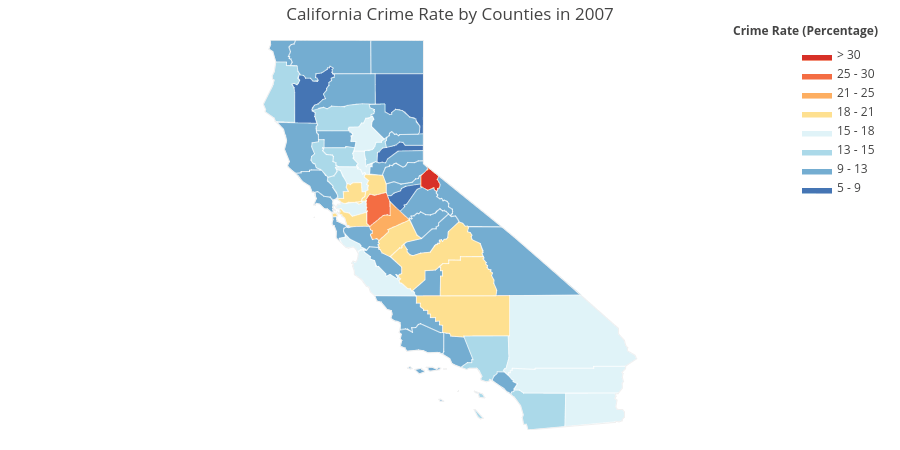

In [6]:
from IPython.display import Image
with open('./images/GIF/crime_rate_animation.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

### Unemployment Rate
The unemployment rate animation can be seen below, and we see that in around 2009 the unemployment rate shoots up. This can be explained by the 2008 financial crisis in the stock market. With its crash, there was most likely a huge loss in jobs in California. 

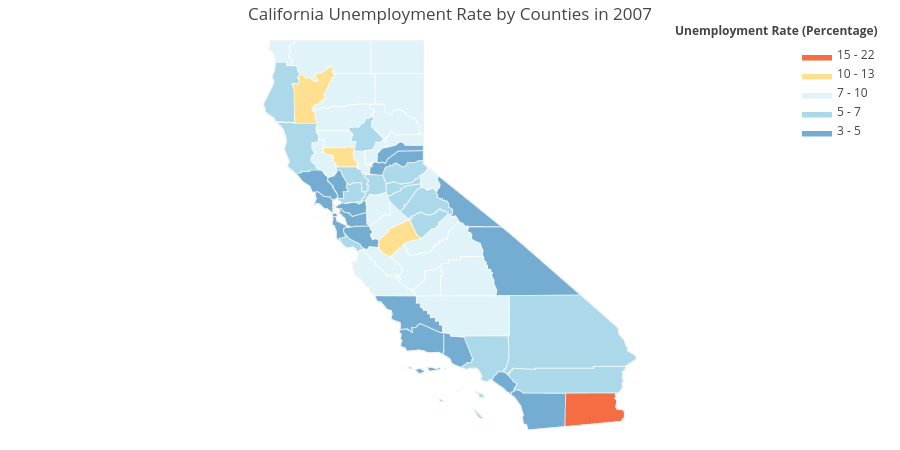

In [4]:
from IPython.display import Image
with open('./images/GIF/unemployment_rate_animation.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

### Physical Test Pass Rate
The pass rate in the California Physical Fitness Test can be seen across different counties in the animation below. We observe that there is a huge jump in physical test pass rate in 2011 and beyond, and from our web searches online, we found that in 2011 there was an initiative by the California government to improve the physical fitness of students in the state, called the Healthy Kids Campaign. This may be an explanation for the huge increase in physical fitness passing rate after 2011.

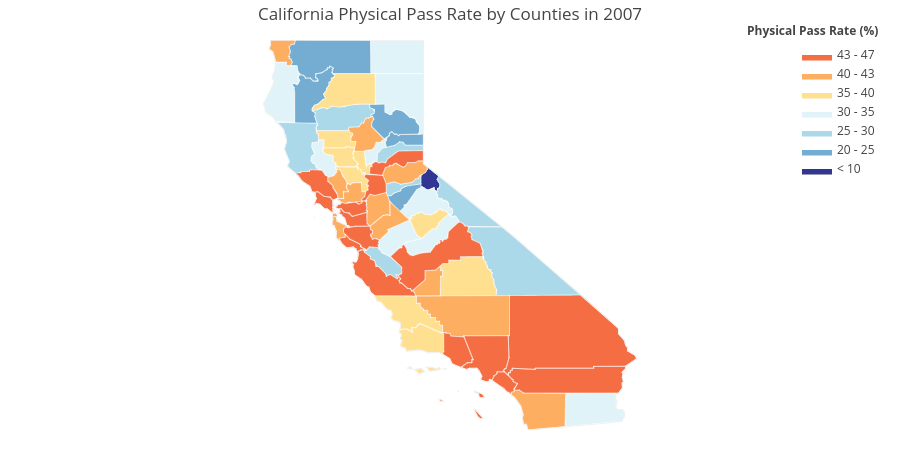

In [5]:
from IPython.display import Image
with open('./images/GIF/physical_pass_rate_animation.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

### SAT Scores
The following animation is a heatmap of average SAT scores in the different 58 counties across California between 2007 and 2013. We see again that for the most part, the animation is consistent throughout the years.

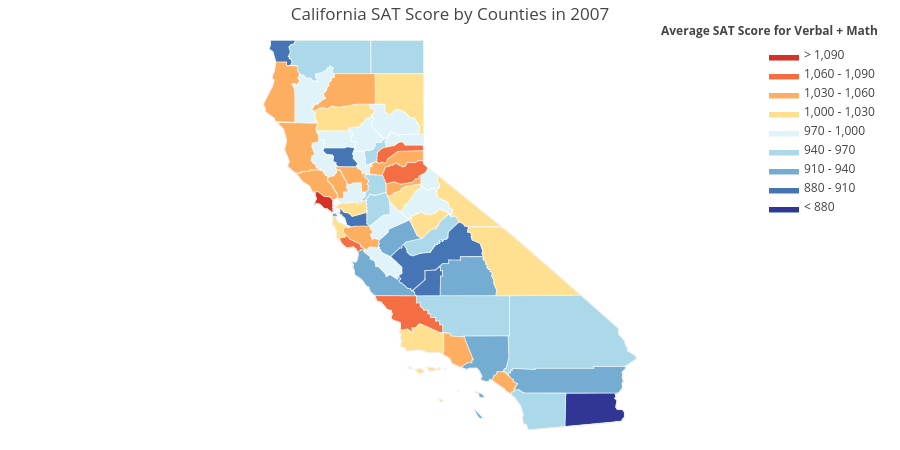

In [6]:
from IPython.display import Image
with open('./images/GIF/sat_scores_animation.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

# Analysis of Trends
After looking at each dataset individually, we now want to see if there are any trends between the SAT scores and each of the other datasets. For each datapoint, we took the average crime/unemployment/physical fitness pass rate across all counties and plotted it as a line plot across the seven years. Although there are not nearly enough datapoints to make a real conclusion, the data that we have can still be informative.

### Crime Rate
We see that the average crime rate initially dropped between 2007 and 2009 before rising again. This may be caused by the financial crisis in 2008.

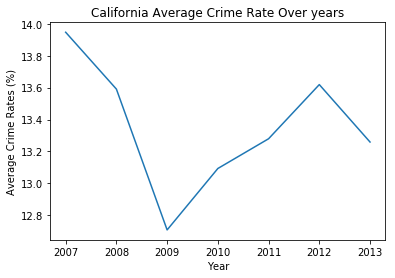

In [14]:
df_crime = pickle.load(open("./data/crime_rates.pkl","rb"))
crime_rate_year_avg = []
year_list = [a for a in range(2007,2014)]
for year in year_list:
    crime_rates = [a for a in df_crime.xs(year,axis=1).tolist()]
    crime_rate_year_avg.append(sum(crime_rates)*100/len(crime_rates))

plt.figure()
plt.title("California Average Crime Rate Over years")
plt.ylabel("Average Crime Rates (%)")
plt.xlabel("Year")
plt.plot(year_list,crime_rate_year_avg)
#plt.savefig("crime_rate_year_avg.png")
plt.show()

### Unemployment Rate
The unemployment rate drastically rose between 2007 and 2010 and can be explained again by the financial crisis in 2008. We also see that there is a period of recovery from unemployment after 2010 -- two years after the crisis.

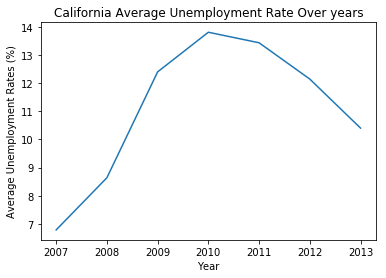

In [15]:
df_unemploymentdf_unemp  = pickle.load(open("./data/unemployment_rates.pkl","rb"))
unemployment_rate_year_avg = []
year_list = [a for a in range(2007,2014)]
for year in year_list:
    unemployment_rates = [a for a in df_unemployment.xs(str(year),axis=1).tolist()]
    unemployment_rate_year_avg.append(sum(unemployment_rates)/len(unemployment_rates))
    
plt.figure()
plt.title("California Average Unemployment Rate Over years")
plt.ylabel("Average Unemployment Rates (%)")
plt.xlabel("Year")
plt.plot(year_list,unemployment_rate_year_avg)
#plt.savefig("unemployment_rate_year_avg.png")
plt.show()    

### Physical Test Pass Rate
For the average pass rate of the physical fitness test in Califonia, we see there is a drastic increase in passing rate in 2010/2011. This can be explained by the Healthy Kids Campaign that was proposed and implemented in 2011 in order to increase the fitness of children in our state.

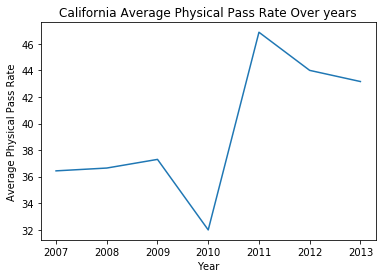

In [16]:
df_phyisical = pickle.load(open("./data/physical_fitness_data.pkl","rb")).transpose()
physical_scores_year_avg = []
year_list = [a for a in range(2007,2014)]
for year in year_list:
    physical_scores = [a for a in df_phyisical.xs(str(year),axis=1).tolist()]
    physical_scores_year_avg.append(sum(physical_scores)/len(physical_scores))

plt.figure()
plt.title("California Average Physical Pass Rate Over years")
plt.ylabel("Average Physical Pass Rate")
plt.xlabel("Year")
plt.plot(year_list,physical_scores_year_avg)
#plt.savefig("physical_scores_year_avg.png")
plt.show()

### SAT Score
We see an increase and decrease in the average SAT scores over the seven years. However, since we only have seven datapoints, we cannot draw any reasonable conclusions as for if this increase/decrease is an anomally or not.

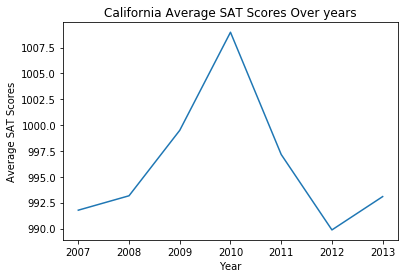

In [13]:
df_sat = pickle.load(open("./data/sat_data.pkl","rb"))
sat_scores_year_avg = []
year_list = [a for a in range(2007,2014)]
for i in range(7,len(df_sat)):
    sat_verbal = df_sat[i].xs(df_sat[i].columns[1],axis=1).tolist()
    sat_math = df_sat[i].xs(df_sat[i].columns[2],axis=1).tolist()
    total = [a+b for a,b in zip(sat_verbal,sat_math)]
    default_none = sum(total)/len(total)
    total.insert(1,default_none)
    if i == 9: total.insert(45,default_none)
    sat_scores_year_avg.append(sum(total)/len(total))

plt.figure()
plt.title("California Average SAT Scores Over years")
plt.ylabel("Average SAT Scores")
plt.xlabel("Year")
plt.plot(year_list,sat_scores_year_avg)
#plt.savefig("sat_scores_year_avg.png")
plt.show()

# Scatter Plots
Averaging the data across all counties can be informative for seeing trends for the entire state, but it cannot show details about the correlation in counties. Therefore, more plots are required for further analysis, including a pair-wise analysis using scatter plots. To do this, we first load the data:

In [8]:
df_sat = pickle.load(open("./data/sat_data.pkl","rb"))
df_physical = pickle.load(open("./data/physical_fitness_data.pkl","rb"))
df_unemployment = pickle.load(open("./data/unemployment_rates.pkl","rb"))
df_crime = pickle.load(open("./data/crime_rates.pkl","rb"))

Next, we collect the statistical data for SAT scores:

In [10]:
sat_total = []
sat_total_county = np.zeros((1,58))
for i in range(7,len(df_sat)):
    sat_verbal = df_sat[i].xs(df_sat[i].columns[1],axis=1).tolist()
    sat_math = df_sat[i].xs(df_sat[i].columns[2],axis=1).tolist()
    total = [a+b for a,b in zip(sat_verbal,sat_math)]
    default_none = sum(total)/len(total)
    total.insert(1,default_none)
    if i == 9: total.insert(45,default_none)
    sat_total.append(total)
    sat_total_county += np.array(total)

For each of the following scatter plots, we will show one plot with only the scatter plot, and one figure with the scatter plots in addition to a fitted line for each year. Each datapoint represents one county within California, and the different colors correspond to the different years that we are interested in (as seen in the legend).

### SAT score vs Unemployment Rate

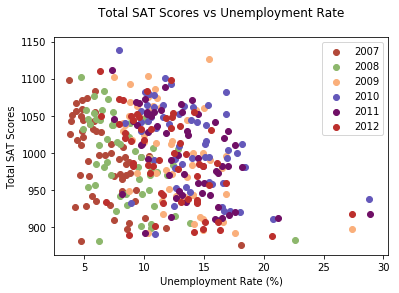

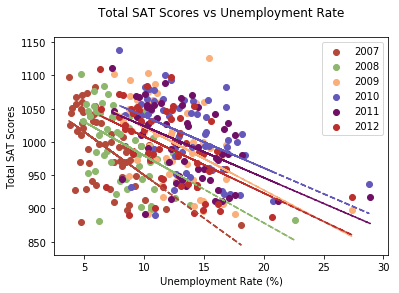

In [20]:
# Make scatter plot
np.random.seed(123)
plt.figure()
for year in range(2007,2013):
    x_list = df_unemployment.xs(str(year),axis=1).tolist()
    y_list = sat_total[year-2007]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Total SAT Scores")
    plt.xlabel("Unemployment Rate (%)")
plt.title("Total SAT Scores vs Unemployment Rate\n")
plt.legend([str(a) for a in range(2007,2014)])
plt.show()

# Make scatter plot with trend line
np.random.seed(123)
plt.figure()
for year in range(2007,2013):
    x_list = df_unemployment.xs(str(year),axis=1).tolist()
    y_list = sat_total[year-2007]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Total SAT Scores")
    plt.xlabel("Unemployment Rate (%)")
plt.title("Total SAT Scores vs Unemployment Rate\n")
plt.legend([str(a) for a in range(2007,2014)])
np.random.seed(123)
for year in range(2007,2013):
    x_list = df_unemployment.xs(str(year),axis=1).tolist()
    y_list = sat_total[year-2007]
    z = np.polyfit(x_list, y_list, 1)
    p = np.poly1d(z)
    plt.plot(x_list,p(x_list),"r--", c=np.random.rand(3,))
plt.show()

Looking at the plots above, we see that for all years there is a negative correlation between SAT scores and the unemployment rate for each county. This makes sense: for counties with larger unemployment rates, families may not have the financial abilities to send their children to SAT prep courses or programs. On the other hand, for counties that have a lower unemployment rate, more families will have the financial means to pay for prep programs for students who are taking the SAT, thereby resulting in a higher total SAT score.

### SAT Score vs Crime Rate

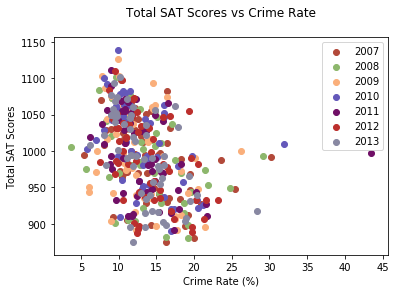

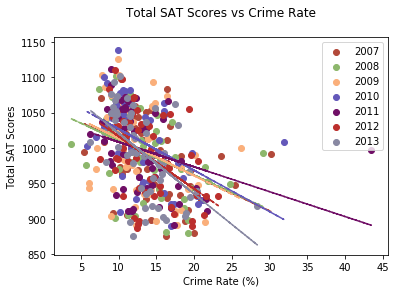

In [21]:
# Make scatter plot
np.random.seed(123)
plt.figure()
for year in range(2007,2014):
    x_list = [a*100 for a in df_crime.xs(year,axis=1).tolist()]
    y_list = sat_total[year-2007]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Total SAT Scores")
    plt.xlabel("Crime Rate (%)")
plt.title("Total SAT Scores vs Crime Rate\n")
plt.legend([str(a) for a in range(2007,2014)])
plt.show()

# Make scatter plot with trend line
np.random.seed(123)
plt.figure()
for year in range(2007,2014):
    x_list = [a*100 for a in df_crime.xs(year,axis=1).tolist()]
    y_list = sat_total[year-2007]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Total SAT Scores")
    plt.xlabel("Crime Rate (%)")
plt.title("Total SAT Scores vs Crime Rate\n")
plt.legend([str(a) for a in range(2007,2014)])
np.random.seed(123)
for year in range(2007,2014):
    x_list = [a*100 for a in df_crime.xs(year,axis=1).tolist()]
    y_list = sat_total[year-2007]
    z = np.polyfit(x_list, y_list, 1)
    p = np.poly1d(z)
    plt.plot(x_list,p(x_list),"r--", c=np.random.rand(3,))
plt.show()

By the same notion as SAT score vs unemployment rate, we see a negative trend in SAT scores vs crime rates as well. This too makes sense: for counties that have a larger rate of crimes, those are typically counties that are less financially stable or a lower average of family income. This would directly affect the SAT scores. In addition, there may be a lesser number of SAT prep programs for counties with higher crime rates, since these programs may not want to establish a program in such counties due to safety concerns. Therefore, counties with a higher rate of crimes would have students that perform worse in the SAT than counties with lower crime rates. This is evident in the graphs above.

### SAT Score vs Physical Test Pass Rate

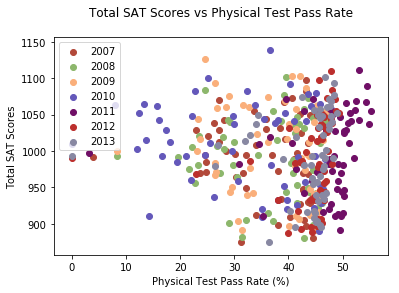

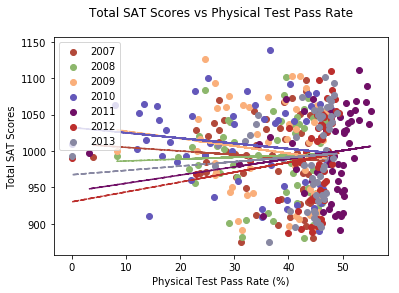

In [11]:
# Make scatter plot
np.random.seed(123)
plt.figure()
for year in range(2007,2014):
    x_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    y_list = sat_total[year-2007]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Total SAT Scores")
    plt.xlabel("Physical Test Pass Rate (%)")
plt.title("Total SAT Scores vs Physical Test Pass Rate\n")
plt.legend([str(a) for a in range(2007,2014)])
plt.show()

# Make scatter plot with trend line
np.random.seed(123)
plt.figure()
for year in range(2007,2014):
    x_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    y_list = sat_total[year-2007]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Total SAT Scores")
    plt.xlabel("Physical Test Pass Rate (%)")
plt.title("Total SAT Scores vs Physical Test Pass Rate\n")
plt.legend([str(a) for a in range(2007,2014)])
np.random.seed(123)
for year in range(2007,2014):
    x_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    y_list = sat_total[year-2007]
    z = np.polyfit(x_list, y_list, 1)
    p = np.poly1d(z)
    plt.plot(x_list,p(x_list),"r--", c=np.random.rand(3,))
plt.show()

The previous graphs (SAT vs unemployment and SAT vs crime rates) were intuitive and quite obvious in why we saw a decreasing trend. However, for SAT vs physical fitness test pass rate, there is no clear trend in how the overall physical fitness of a county affects the SAT scores of students within that county. While there are studies that have shown that physical fitness may affect cognitive abilities, we cannot conclude anything from these scatter plots and therefore we conclude there there is no distinct correlation between SAT scores and physical fitness in California counties.

### Physical Test Pass Rate vs Unemployment Rate

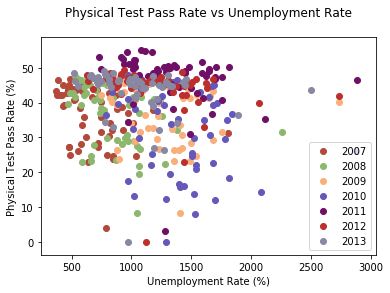

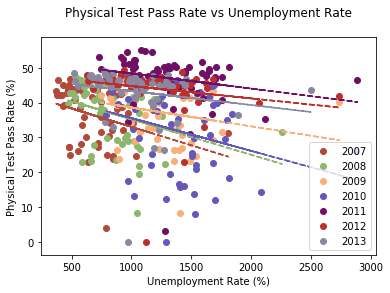

In [22]:
# Make scatter plot
np.random.seed(123)
plt.figure()
for year in range(2007,2014):
    x_list = [a*100 for a in df_unemployment.xs(str(year),axis=1).tolist()]
    y_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Physical Test Pass Rate (%)")
    plt.xlabel("Unemployment Rate (%)")
plt.title("Physical Test Pass Rate vs Unemployment Rate\n")
plt.legend([str(a) for a in range(2007,2014)])
plt.show()

# Make scatter plot with trend line
np.random.seed(123)
plt.figure()
for year in range(2007,2014):
    x_list = [a*100 for a in df_unemployment.xs(str(year),axis=1).tolist()]
    y_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Physical Test Pass Rate (%)")
    plt.xlabel("Unemployment Rate (%)")
plt.title("Physical Test Pass Rate vs Unemployment Rate\n")
plt.legend([str(a) for a in range(2007,2014)])
np.random.seed(123)
for year in range(2007,2014):
    x_list = [a*100 for a in df_unemployment.xs(str(year),axis=1).tolist()]
    y_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    z = np.polyfit(x_list, y_list, 1)
    p = np.poly1d(z)
    plt.plot(x_list,p(x_list),"r--", c=np.random.rand(3,))    
plt.show()

In addition to analyzing how different properties of counties may affect the SAT performance in high school students, we decided to also take a look at the correlation of physical fitness versus the unemployment rate of a county just for fun. We see that there is a slight negative correlation, i.e. as unemployment rate goes up, the physical fitness goes down. That may be explained by how sports programs typically cost money for students to attend, and if a family's parents are unemployed then they would not have the financial means to send their children to these sports programs.

### Physical Test Pass Rate vs Crime Rate

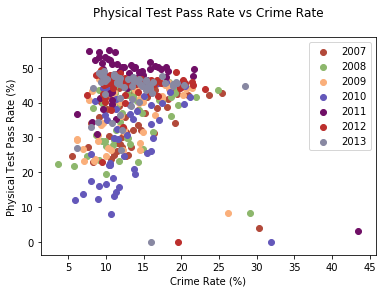

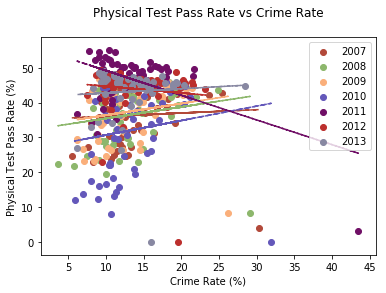

In [23]:
# Make scatter plot
np.random.seed(123)
plt.figure()
for year in range(2007,2014):
    x_list = [a*100 for a in df_crime.xs(year,axis=1).tolist()]
    y_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Physical Test Pass Rate (%)")
    plt.xlabel("Crime Rate (%)")
plt.title("Physical Test Pass Rate vs Crime Rate\n")
plt.legend([str(a) for a in range(2007,2014)])
plt.show()

# Make scatter plot with trend line
np.random.seed(123)
plt.figure()
for year in range(2007,2014):
    x_list = [a*100 for a in df_crime.xs(year,axis=1).tolist()]
    y_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    plt.scatter(x_list,y_list, c=np.random.rand(3,))
    plt.ylabel("Physical Test Pass Rate (%)")
    plt.xlabel("Crime Rate (%)")
plt.title("Physical Test Pass Rate vs Crime Rate\n")
plt.legend([str(a) for a in range(2007,2014)])
np.random.seed(123)
for year in range(2007,2014):
    x_list = [a*100 for a in df_crime.xs(year,axis=1).tolist()]
    y_list = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    z = np.polyfit(x_list, y_list, 1)
    p = np.poly1d(z)
    plt.plot(x_list,p(x_list),"r--", c=np.random.rand(3,))
plt.show()

In the same notion, we also created a scatter plot of physical fitness versus crime rate for the counties in California. We see that there is no distinct correlation in the fitted lines, and therefore once again we make no conclusion on the correlation between these two datasets. 

# Box Plot and Violin Plot
These scatter plots with trend lines allow us to visualize basic trending information for the correlation of analyzed pair properties. In order to further analyze the distribution information among the pair analysis, more advanced plots are required to visualize their relationship. This can be done using box plots and violin plots, which show the probability distribution and mean of a given dataset. We first collect pair data for SAT scores with the following:

In [14]:
crime_sat_pair = []
unemployment_sat_pair = []
physical_sat_pair = []
year_list = [a for a in range(2007,2014)]
for year in year_list:
    crime_rates = [a for a in df_crime.xs(year,axis=1).tolist()]
    unemployment_rates = [a for a in df_unemployment.xs(str(year),axis=1).tolist()]
    physical_scores = [a for a in df_physical.transpose().xs(str(year),axis=1).tolist()]
    
    sat_verbal = df_sat[year-2007+7].xs(df_sat[year-2007+7].columns[1],axis=1).tolist()
    sat_math = df_sat[year-2007+7].xs(df_sat[year-2007+7].columns[2],axis=1).tolist()
    total = [a+b for a,b in zip(sat_verbal,sat_math)]
    default_none = sum(total)/len(total)
    total.insert(1,default_none)
    if i == 9: total.insert(45,default_none)    

    crime_sat_pair += [(a,b) for a,b in zip(crime_rates,total)]
    unemployment_sat_pair += [(a,b) for a,b in zip(unemployment_rates,total)]
    physical_sat_pair += [(a,b) for a,b in zip(physical_scores,total)]

### SAT Score vs Crime Rate

In [28]:
crime_sat_pair_batch_1 = []
crime_sat_pair_batch_2 = []
crime_sat_pair_batch_3 = []
crime_sat_pair_batch_4 = []
year_list = [a for a in range(2007,2014)]
for t in crime_sat_pair:
    if t[0]<=0.1:
        crime_sat_pair_batch_1.append(t[1])
    if t[0]>0.1 and t[0]<=0.15:
        crime_sat_pair_batch_2.append(t[1])
    if t[0]>0.15 and t[0]<=0.2:
        crime_sat_pair_batch_3.append(t[1])
    if t[0]>0.2:
        crime_sat_pair_batch_4.append(t[1])
        
crime_sat_pair_batches = [crime_sat_pair_batch_1,
                          crime_sat_pair_batch_2,
                          crime_sat_pair_batch_3,
                          crime_sat_pair_batch_4]

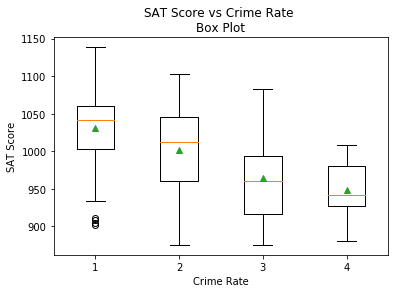

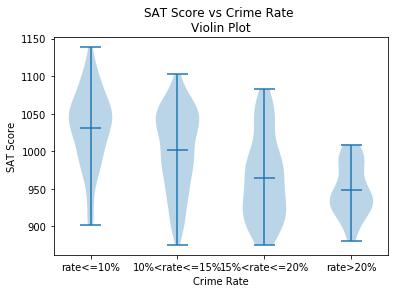

In [29]:
plt.xticks(np.arange(1,5),['rate<=10%', '10%<rate<=15%', '15%<rate<=20%', 'rate>20%'])
plt.ylabel('SAT Score')
plt.xlabel('Crime Rate')
plt.title('SAT Score vs Crime Rate \nBox Plot')
plt.boxplot(crime_sat_pair_batches, vert=True,showmeans=True)
plt.show()

plt.xticks(np.arange(1,5),['rate<=10%', '10%<rate<=15%', '15%<rate<=20%', 'rate>20%'])
plt.ylabel('SAT Score')
plt.xlabel('Crime Rate')
plt.title('SAT Score vs Crime Rate \nViolin Plot')
plt.violinplot(crime_sat_pair_batches, vert=True,showmeans=True)
plt.show()

The above plots are the box and violin plots for SAT scores versus crime rate. In general, box plots are just a less advanced version of the violin plot. Box plots show the average and standard deviation for a segmented portion of the data (in the case, we see that the segments are rates <= 10%, 10% < rate <= 15%, 15% < rate <= 20%, and rate > 20%). The violin plot additionally shows the distribution of SAT scores (in this example). For these two plots, we see a trend that is intuitive with what we expect: as the crime rate increases, the average SAT score decreases and the distribution tends towards lower SAT scores. Again, this can be explained for reasons metioned in the scatter plot section.

### SAT Score vs Unemployment Rate

In [35]:
unemployment_sat_pair_batch_1 = []
unemployment_sat_pair_batch_2 = []
unemployment_sat_pair_batch_3 = []
unemployment_sat_pair_batch_4 = []
year_list = [a for a in range(2007,2014)]
for t in unemployment_sat_pair:
    if t[0]<=10:
        unemployment_sat_pair_batch_1.append(t[1])
    if t[0]>10 and t[0]<=15:
        unemployment_sat_pair_batch_2.append(t[1])
    if t[0]>15 and t[0]<=20:
        unemployment_sat_pair_batch_3.append(t[1])
    if t[0]>20:
        unemployment_sat_pair_batch_4.append(t[1])
        
unemployment_sat_pair_batches = [unemployment_sat_pair_batch_1,
                                 unemployment_sat_pair_batch_2,
                                 unemployment_sat_pair_batch_3,
                                 unemployment_sat_pair_batch_4]

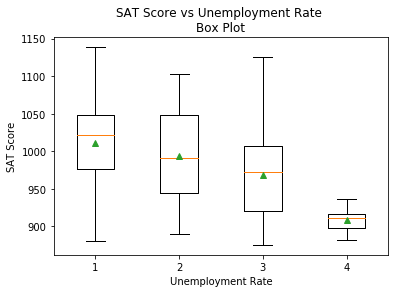

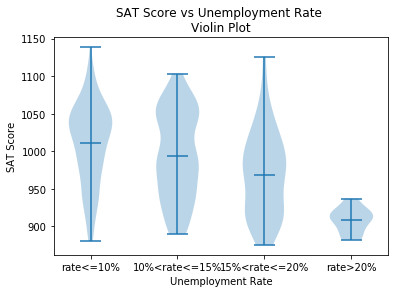

In [36]:
plt.xticks(np.arange(1,5),['rate<=10%', '10%<rate<=15%', '15%<rate<=20%', 'rate>20%'])
plt.ylabel('SAT Score')
plt.xlabel('Unemployment Rate')
plt.title('SAT Score vs Unemployment Rate \nBox Plot')
plt.boxplot(unemployment_sat_pair_batches, vert=True,showmeans=True)
plt.show()

plt.xticks(np.arange(1,5),['rate<=10%', '10%<rate<=15%', '15%<rate<=20%', 'rate>20%'])
plt.ylabel('SAT Score')
plt.xlabel('Unemployment Rate')
plt.title('SAT Score vs Unemployment Rate \nViolin Plot')
plt.violinplot(unemployment_sat_pair_batches, vert=True,showmeans=True)
plt.show()

Looking at the box and violin plots for SAT score versus unemployment rate, we again see a trend that is what we expect: as the unemployment rate increases, the distribution for SAT scores tends towards lower SAT scores. We also see that for lower unemployment rates, there is a larger standard deviation and range of scores while for higher unemployment rates, there is a smaller standard deviation and range.

### SAT Scores vs Physical Test Rate

In [15]:
physical_sat_pair_batch_1 = []
physical_sat_pair_batch_2 = []
physical_sat_pair_batch_3 = []
physical_sat_pair_batch_4 = []
year_list = [a for a in range(2007,2014)]
for t in physical_sat_pair:
    if t[0]<=20:
        physical_sat_pair_batch_1.append(t[1])
    if t[0]>20 and t[0]<=30:
        physical_sat_pair_batch_2.append(t[1])
    if t[0]>30 and t[0]<=40:
        physical_sat_pair_batch_3.append(t[1])
    if t[0]>40:
        physical_sat_pair_batch_4.append(t[1])
        
physical_sat_pair_batches = [physical_sat_pair_batch_1,
                                 physical_sat_pair_batch_2,
                                 physical_sat_pair_batch_3,
                                 physical_sat_pair_batch_4]

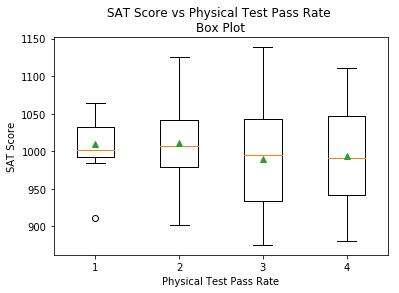

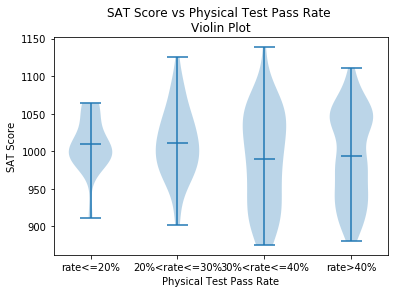

In [16]:
plt.xticks(np.arange(1,5),['rate<=20%', '20%<rate<=30%', '30%<rate<=40%', 'rate>40%'])
plt.ylabel('SAT Score')
plt.xlabel('Physical Test Pass Rate')
plt.title('SAT Score vs Physical Test Pass Rate \nBox Plot')
plt.boxplot(physical_sat_pair_batches, vert=True,showmeans=True)
plt.show()

plt.xticks(np.arange(1,5),['rate<=20%', '20%<rate<=30%', '30%<rate<=40%', 'rate>40%'])
plt.ylabel('SAT Score')
plt.xlabel('Physical Test Pass Rate')
plt.title('SAT Score vs Physical Test Pass Rate \nViolin Plot')
plt.violinplot(physical_sat_pair_batches, vert=True,showmeans=True)
plt.show()

Finally, looking at the box and violin plots for SAT score versus physical fitness test pass rate, we draw the same conclusion as before: there is no direct (or obvious) correlation between these two properties. The average SAT score tends to be the same across different categories of physical test pass rates, and therefore there is no direct correlation in the data that we used.

Again, although we are mainly interersted in how the SAT scores are correlated with different properties of counties (i.e., crime rates, unemployment, fitness), we also analyzed how the physical fitness affected the other properties. To do this, we first collected the physical fitness statistical data using the following:

In [37]:
crime_physical_pair = []
unemployment_physical_pair = []
for year in year_list:
    crime_rates = [a for a in df_crime.xs(year,axis=1).tolist()]
    unemployment_rates = [a for a in df_unemployment.xs(str(year),axis=1).tolist()]
    physical_scores = [a for a in df_phyisical.xs(str(year),axis=1).tolist()]
    crime_physical_pair += [(a,b) for a,b in zip(crime_rates,physical_scores)]
    unemployment_physical_pair += [(a,b) for a,b in zip(unemployment_rates,physical_scores)]

### Physical Test Pass Rate vs Crime Rate

In [38]:
crime_physical_pair_batch_1 = []
crime_physical_pair_batch_2 = []
crime_physical_pair_batch_3 = []
year_list = [a for a in range(2007,2014)]
for t in crime_physical_pair:
    if t[0]<=0.1:
        crime_physical_pair_batch_1.append(t[1])
    if t[0]>0.1 and t[0]<=0.2:
        crime_physical_pair_batch_2.append(t[1])
    if t[0]>0.2:
        crime_physical_pair_batch_3.append(t[1])
        
crime_physical_pair_batches = [crime_physical_pair_batch_1,
                               crime_physical_pair_batch_2,
                               crime_physical_pair_batch_3]

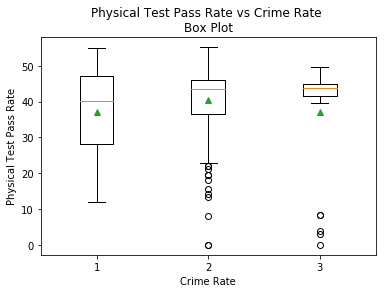

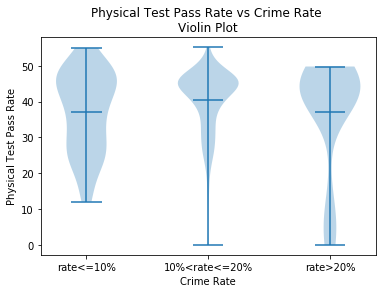

In [39]:
plt.xticks(np.arange(1,4),['rate<=10%', '10%<rate<=20%', 'rate>20%'])
plt.ylabel('Physical Test Pass Rate')
plt.xlabel('Crime Rate')
plt.title('Physical Test Pass Rate vs Crime Rate \nBox Plot')
plt.boxplot(crime_physical_pair_batches, vert=True,showmeans=True)
plt.show()

plt.xticks(np.arange(1,4),['rate<=10%', '10%<rate<=20%', 'rate>20%'])
plt.ylabel('Physical Test Pass Rate')
plt.xlabel('Crime Rate')
plt.title('Physical Test Pass Rate vs Crime Rate \nViolin Plot')
plt.violinplot(crime_physical_pair_batches, vert=True,showmeans=True)
plt.show()

In the box and violin plots above, we see no obvious correlation with physical fitness and crime rates. The average tended to stay the same across different crime rates in counties, and the standard deviation was large.

### Physical Test Pass Rate vs Unemployment Rate

In [40]:
unemployment_physical_pair_batch_1 = []
unemployment_physical_pair_batch_2 = []
unemployment_physical_pair_batch_3 = []
unemployment_physical_pair_batch_4 = []
year_list = [a for a in range(2007,2014)]
for t in unemployment_physical_pair:
    if t[0]<=5:
        unemployment_physical_pair_batch_1.append(t[1])
    if t[0]>5 and t[0]<=10:
        unemployment_physical_pair_batch_2.append(t[1])
    if t[0]>10 and t[0]<=15:
        unemployment_physical_pair_batch_3.append(t[1])
    if t[0] > 15:
        unemployment_physical_pair_batch_4.append(t[1])
        
unemployment_physical_pair_batches = [unemployment_physical_pair_batch_1,
                                      unemployment_physical_pair_batch_2,
                                      unemployment_physical_pair_batch_3,
                                      unemployment_physical_pair_batch_4]

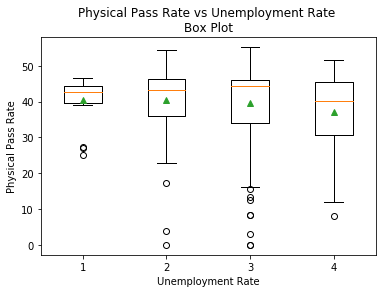

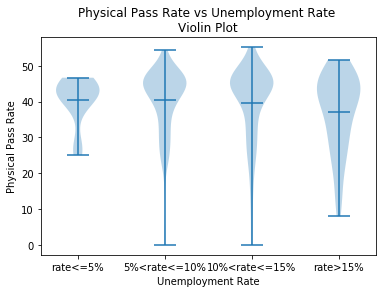

In [41]:
plt.xticks(np.arange(1,5),['rate<=5%', '5%<rate<=10%', '10%<rate<=15%', 'rate>15%'])
plt.ylabel('Physical Pass Rate')
plt.xlabel('Unemployment Rate')
plt.title('Physical Pass Rate vs Unemployment Rate \nBox Plot')
plt.boxplot(unemployment_physical_pair_batches, vert=True,showmeans=True)
plt.show()

plt.xticks(np.arange(1,5),['rate<=5%', '5%<rate<=10%', '10%<rate<=15%', 'rate>15%'])
plt.ylabel('Physical Pass Rate')
plt.xlabel('Unemployment Rate')
plt.title('Physical Pass Rate vs Unemployment Rate \nViolin Plot')
plt.violinplot(unemployment_physical_pair_batches, vert=True,showmeans=True)
plt.show()

We additionally see no obvious trend between physical fitness in students and household unemployment rates by looking at these box and violin plots. We note that there was a slight trend when looking at the scatter plots for these two datasets, which shows the importance of doing multiple different analyses on datasets before drawing any conclusions (i.e., scatter and box/violin plots).

# Conclusion and Discussion
In this project, we were interested in how different properties of California counties affect the SAT performance in high school students, including crime rates, unemployment rates, and physical fitness abilities. To do this, we used several public datasets that were available on official government websites -- and this ensured accuracy and quality in the data provided. Prior to working with the data, we preprocessed each dataset in order to extract meaningful information from the large amounts of provided data. As there was an overlap in years of 2007-2013 between all four datasets, we were interested in conducting our experiments on only those years. Each dataset was then preprocessed into a Pandas dataframe of 7x58, in which the seven rows corresponded to the years (2007-2013) and the 58 columns corresponded to each of the 58 counties in California. We then used this data to conduct several experiments to further analyze the data. We first plotted a California heatmap of each dataset to visuzlize how the data changed across the years for each county, and we saw that for the most part the trends within datsets stayed the same. There was, however, an increase in physical fitness in 2011 due to an initiative by the California government called the Healthy Kids Campaign. These heatmaps allowed for a nice way to spatially visualize the counties. Afterwards, we plotted the average SAT score across all counties against the average crime rates across all counties for each year into a line plot to see if there were any trends throughout the years. We also used scatter plots for each comparison and fitted a line for each scatter plot, and we saw obvious negative trends in SAT vs unemployment and crime rates, but no obvious trends for the others. Finally, we looked at the box plots and violin plots for more information on the distribution (mean/standard deviation) for each dataset split into several categories. These analyses were also done for physical fitness versus unemployment and crime rates.

We conclude that there is a negative trend in SAT scores and unemployment/crime rates, i.e. as the unemployment rate and crime rate increased for a county, the SAT scores of that county decreased. This makes sense, as those two factors directly affect a student's access to SAT prep programs. There was, however, no obvious correlation between SAT scores and a student's physical fitness, according to our analyses. Overall, this project allowed us to quantitatively show the affects of a county's welfare against student performance on a standardized, important test, and motivates the fact that counties need to improve their financial wellbeings and crime rates in order to assist the students within their county.